<a href="https://colab.research.google.com/github/rnlchr/CPE311/blob/main/MIDTERMS/MODULE%209/HOA_9_1_CASTILLO_RONEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hands-on Activity 9.1 Data Visualization using Pandas and Matplotlib**

**CPE311 - Computational Thinking with Python**

Name: Castillo, Ronel Christian V

Section: CPE22S3

Performed on: 07/03/2024

Submitted on: 07/09/2024

Submitted to: Engr. Roman M. Richard

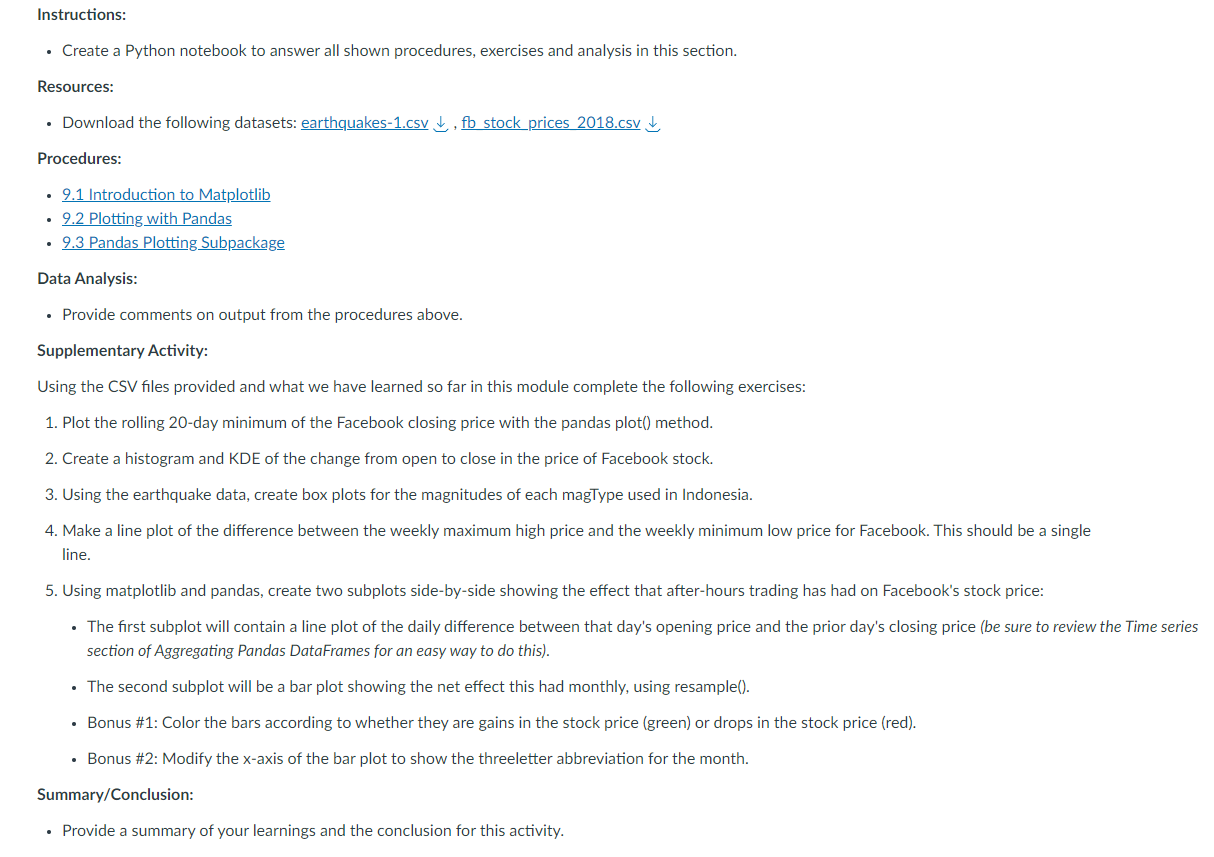

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

fb = pd.read_csv('/content/fb_stock_prices_2018.csv', index_col='date', parse_dates=True)
quakes = pd.read_csv('/content/earthquakes-1.csv')

<Axes: xlabel='date'>

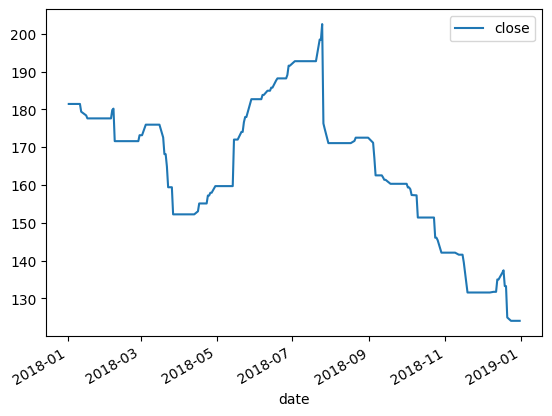

In [3]:
fb.rolling('20D').agg({'close':'min'}).plot()

<Axes: ylabel='Density'>

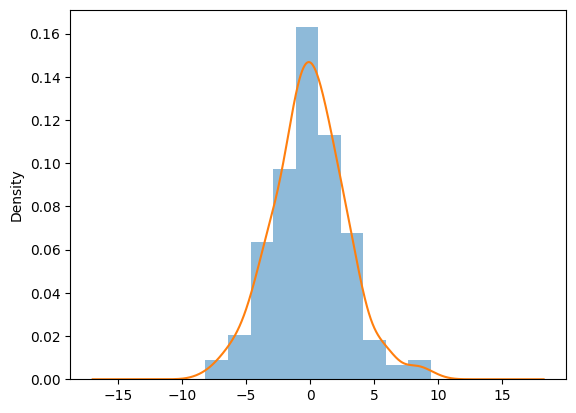

In [4]:
# create a histogram and KDE from opem to close with the price of the facebook stock
changeFB = fb.assign(change = lambda x : x.open-x.close)
ax = changeFB.change.plot(kind = 'hist', density = True, alpha = 0.5)
changeFB.change.plot(ax = ax, kind = 'kde')

mb            Axes(0.1,0.15;0.173913x0.75)
ms_20    Axes(0.308696,0.15;0.173913x0.75)
mwr      Axes(0.517391,0.15;0.173913x0.75)
mww      Axes(0.726087,0.15;0.173913x0.75)
dtype: object

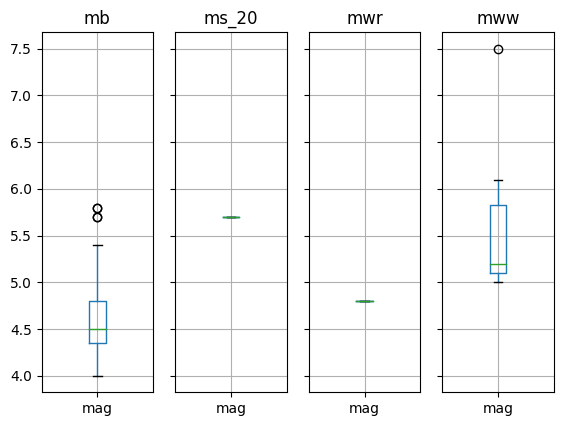

In [5]:
# Using the Earthquake data, create box plots for the magnitude of each magType used in Indonesia.
quakes.query('parsed_place == "Indonesia"').groupby('magType').boxplot(column = 'mag', layout = (1,4))

<Axes: xlabel='date'>

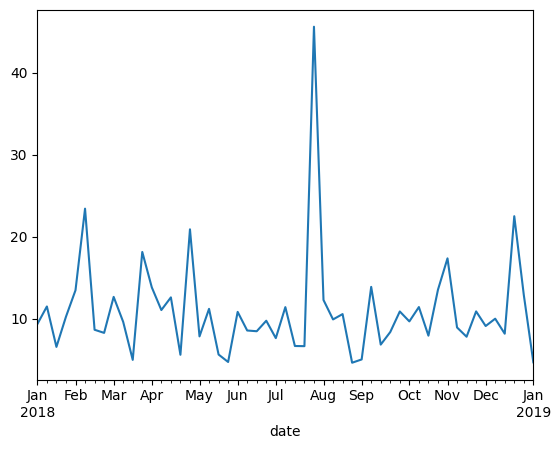

In [6]:
# Make a line plot of the difference between the weekly maximum high price and the weekly minimum low price for Facebook. This should be a single line.
weeklyMax = fb.high.resample('W').max()
weeklyMin = fb.low.resample('W').min()
difference = weeklyMax - weeklyMin
difference.plot()

[Text(0, 0, 'Jan'),
 Text(1, 0, 'Feb'),
 Text(2, 0, 'Mar'),
 Text(3, 0, 'Apr'),
 Text(4, 0, 'May'),
 Text(5, 0, 'Jun'),
 Text(6, 0, 'Jul'),
 Text(7, 0, 'Aug'),
 Text(8, 0, 'Sep'),
 Text(9, 0, 'Oct'),
 Text(10, 0, 'Nov'),
 Text(11, 0, 'Dec')]

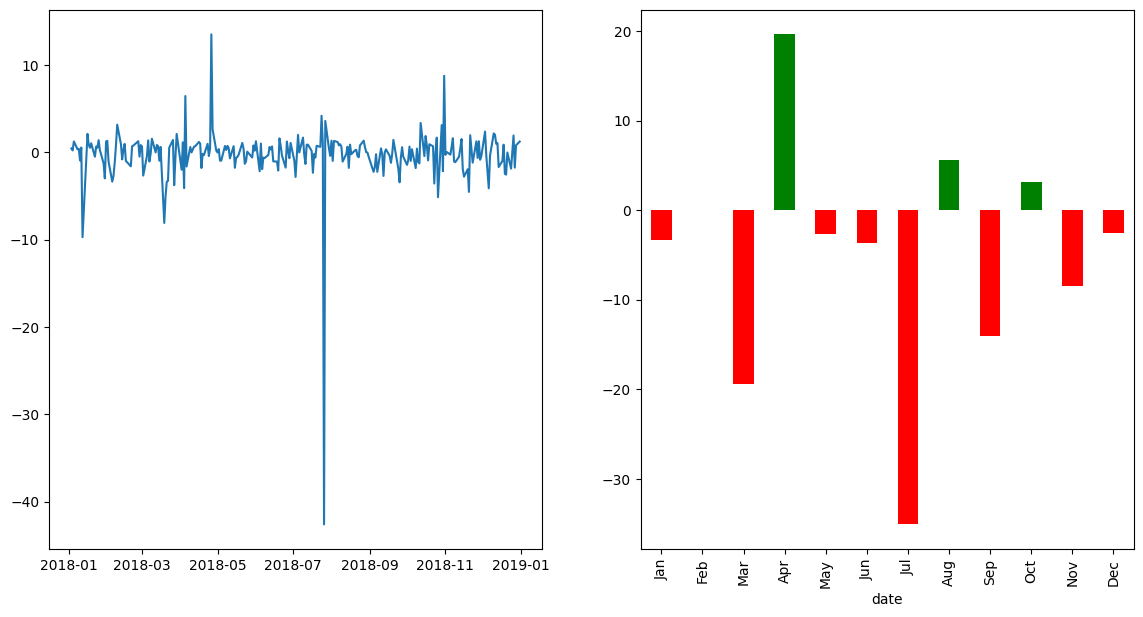

In [7]:
# Using matplotlib and pandas, create two subplots side-by-side showing the effect that after-hours trading has had on Facebook's stock price.
fb = fb.assign(beforeClose= lambda x: x.close.shift(), after=lambda x: x.open - x.beforeClose, change= lambda x: x.after.abs())

figure = plt.figure(figsize = (14,7))
grid = figure.add_gridspec(1,2)
left = figure.add_subplot(grid[0,0])
right = figure.add_subplot(grid[0,1])

left.plot(fb.index, fb.after)
showEffect = fb.after.resample('M').sum()

# Bonus 1
colors = ['red' if value < 0 else 'green' for value in showEffect]
showEffect.plot(kind = 'bar', ax = right, color = colors)

# Bonus 2
right.set_xticklabels(showEffect.index.strftime('%b'))

# **Conclusion**

In this practical exercise, the Python tools Pandas and Matplotlib were used to create data visualizations for the provided datasets. A crucial component of data aggregation and interpretation based on graphical discoveries that support a wide range of useful data science applications is data visualization. I've used the fundamentals of using both Pandas and Matplotlib after quickly going through steps 9.1 through 9.3, which has enabled me to confidently plot and graph the datasets' dataframes as well as the many kinds of accessible graphs and their parameters.